In [ ]:
!nvidia-smi

In [ ]:
#%cd /content
#!rm -rf esun_ai_2022_summer_demo

In [ ]:
# 下載玉山規定的github
!git clone https://github.com/hsiehpinghan/esun_ai_2022_summer_demo.git

In [ ]:
# 安裝套件
!pip install -r /content/esun_ai_2022_summer_demo/model-spec/requirements.txt

In [ ]:
import os
import gdown

from google.colab import files

In [ ]:
# 請上傳 2022summer_train_data.zip
files.upload()

In [ ]:
def gdown_download(id, output_dir, output_file_name):
    os.makedirs(name=output_dir,
                exist_ok=True)
    gdown.download(url=f'https://drive.google.com/uc?id={id}', 
                   output = os.path.join(output_dir, output_file_name), 
                   quiet = False)

# 資料前處理

一、 資料清洗：依比賽規則的說明，將非中文的字元移除。例如：

原始資料：可能導致ab股市泡79沫再現

清洗後資料：可能導致股市泡沫再現

二、 找出詞的錯誤翻譯詞：比對ground_truth_sentence與sentence_list，找出每個詞可能被錯誤辨識成什麼字，例如” 股市”這個詞經過比對後可以找出曾被錯誤辨識成”不是”、 ”不適”、 ”古市”、 ”古式”、 ”告示”、 ”故事”等詞。

三、 進行資料增強：除了玉山提供的訓練資料外，另外隨機將ground_truth_sentence資料中的詞替換成錯誤辨識的詞，並加入sentence_list一同訓練。例如”可能導致股市泡沫再現”這個句子可能替換成” 可能導致不是泡沫再現”、 ” 可能導致不適泡沫再現”、 ” 可能導致古市泡沫再現”、 ” 可能導致古式泡沫再現”、 ” 可能導致告示泡沫再現” 、 ” 可能導致故事泡沫再現”。

In [ ]:
%cd /content/esun_ai_2022_summer_demo/model-spec/data_preprocess

In [ ]:
!python ./data_preprocess.py --esun_data_path /content/2022summer_train_data.zip\
                             --extract_dir /content/data\
                             --limit_per_sentence 30\
                             --char_to_similarity_bert_ids_file_path /content/data/char_to_similarity_bert_ids.json

# 模型訓練

一、模型訓練：接著我們使用macbert的預訓練模型(https://huggingface.co/shibing624/macbert4csc-base-chinese)將sentence_list當做input，訓練模型預測ground_truth_sentence的output。

二、Ensemble model：接著我們以k=5進行kfold訓練5個模型，最後將這5個模型ensemble成最終的模型。

三、訓練時使用patience為3的ReduceLROnPlateau及patience為5的EarlyStopping，最佳模型的選擇方式是比較驗證集的cer，愈小視為愈佳。

In [ ]:
%cd /content/esun_ai_2022_summer_demo/model-spec/model

In [ ]:
os.makedirs(name='/content/checkpoint/0',
            exist_ok=True)
# 可以從頭訓練模型 (kfold 1/5)
"""
!python ./training.py --accelerator gpu\
                      --accumulate_grad_batches 1\
                      --benchmark\
                      --device 1\
                      --log_every_n_steps 1\
                      --max_epochs 100\
                      --model_name shibing624/macbert4csc-base-chinese\
                      --data_path /content/data/esun_ai_2022_summer_20220415.txt\
                      --batch_size 64\
                      --max_length 128\
                      --lr 5e-6\
                      --split 0\
                      --checkpoint_output_dir /content/checkpoint
"""
# 或是下載已經訓練好的模型 (kfold 1/5)
gdown_download(id='18ZYoxskrvV4Y6EFoiLPowV4z3AGV_OcR',
               output_dir='/tmp',
               output_file_name='transformers_0.zip')
!unzip /tmp/transformers_0.zip -d /content/checkpoint/0
!mv /content/checkpoint/0/transformers/* /content/checkpoint/0

In [ ]:
os.makedirs(name='/content/checkpoint/1',
            exist_ok=True)
# 可以從頭訓練模型 (kfold 2/5)
"""
!python ./training.py --accelerator gpu\
                      --accumulate_grad_batches 1\
                      --benchmark\
                      --device 1\
                      --log_every_n_steps 1\
                      --max_epochs 100\
                      --model_name shibing624/macbert4csc-base-chinese\
                      --data_path /content/data/esun_ai_2022_summer_20220415.txt\
                      --batch_size 64\
                      --max_length 128\
                      --lr 5e-6\
                      --split 1\
                      --checkpoint_output_dir /content/checkpoint
"""
# 或是下載已經訓練好的模型 (kfold 2/5)
gdown_download(id='1e-jeIaDGEJUdYuQT1gwLm5EGiELSS6os',
               output_dir='/tmp',
               output_file_name='transformers_1.zip')
!unzip /tmp/transformers_1.zip -d /content/checkpoint/1
!mv /content/checkpoint/1/transformers/* /content/checkpoint/1

In [ ]:
os.makedirs(name='/content/checkpoint/2',
            exist_ok=True)
# 可以從頭訓練模型 (kfold 3/5)
"""
!python ./training.py --accelerator gpu\
                      --accumulate_grad_batches 1\
                      --benchmark\
                      --device 1\
                      --log_every_n_steps 1\
                      --max_epochs 100\
                      --model_name shibing624/macbert4csc-base-chinese\
                      --data_path /content/data/esun_ai_2022_summer_20220415.txt\
                      --batch_size 64\
                      --max_length 128\
                      --lr 5e-6\
                      --split 2\
                      --checkpoint_output_dir /content/checkpoint
"""
# 或是下載已經訓練好的模型 (kfold 3/5)
gdown_download(id='1V4KQkaNcBH_fY8-MrMXrQ5H09fXPrCUs',
               output_dir='/tmp',
               output_file_name='transformers_2.zip')
!unzip /tmp/transformers_2.zip -d /content/checkpoint/2
!mv /content/checkpoint/2/transformers/* /content/checkpoint/2

In [ ]:
os.makedirs(name='/content/checkpoint/3',
            exist_ok=True)
# 可以從頭訓練模型 (kfold 4/5)
"""
!python ./training.py --accelerator gpu\
                      --accumulate_grad_batches 1\
                      --benchmark\
                      --device 1\
                      --log_every_n_steps 1\
                      --max_epochs 100\
                      --model_name shibing624/macbert4csc-base-chinese\
                      --data_path /content/data/esun_ai_2022_summer_20220415.txt\
                      --batch_size 64\
                      --max_length 128\
                      --lr 5e-6\
                      --split 3\
                      --checkpoint_output_dir /content/checkpoint
"""
# 或是下載已經訓練好的模型 (kfold 4/5)
gdown_download(id='1sFyki6Z-wQpgEs0tHhlANptG-Te6WTTR',
               output_dir='/tmp',
               output_file_name='transformers_3.zip')
!unzip /tmp/transformers_3.zip -d /content/checkpoint/3
!mv /content/checkpoint/3/transformers/* /content/checkpoint/3

In [ ]:
os.makedirs(name='/content/checkpoint/4',
            exist_ok=True)
# 可以從頭訓練模型 (kfold 5/5)
"""
!python ./training.py --accelerator gpu\
                      --accumulate_grad_batches 1\
                      --benchmark\
                      --device 1\
                      --log_every_n_steps 1\
                      --max_epochs 100\
                      --model_name shibing624/macbert4csc-base-chinese\
                      --data_path /content/data/esun_ai_2022_summer_20220415.txt\
                      --batch_size 64\
                      --max_length 128\
                      --lr 5e-6\
                      --split 4\
                      --checkpoint_output_dir /content/checkpoint
"""
# 或是下載已經訓練好的模型 (kfold 5/5)
gdown_download(id='1vMwN966NXnyD6Clre3nwNEfrLcdsvERW',
               output_dir='/tmp',
               output_file_name='transformers_4.zip')
!unzip /tmp/transformers_4.zip -d /content/checkpoint/4
!mv /content/checkpoint/4/transformers/* /content/checkpoint/4

# 模型推論

一、 語音矯正：ensemble模型推論出一段句子中每個字的位置替換成其他字的機率後，我們會以input句子中每個字的發音決定最後可能的替代字及其機率，例如：

輸入：可能導致不是泡沫在見

原始輸出：可能導致房市泡沫再現 (這邊以字代替logits方便說明)

修正後輸出：可能導致股市泡沫再現 (因為只會選logits結果中與”不”的音相近的字，因此最後”股”是在這個限制條件下機率最大的字)

二、回傳推論結果：最後將sentence_list中各sentence推論的結果中，各字的機率做平均，取分數最高的sentence視為本次推論的結果。


In [ ]:
%cd /content/esun_ai_2022_summer_demo/model-spec/inference

In [ ]:
!python ./inference.py --request '{"esun_uuid": "adefb7e8d9268b972b95b6fa53db93780b6b22fbf", "esun_timestamp": 1590493849, "sentence_list": ["喂 你好 密碼 我 要 進去", "喂 你好 密碼 哇 進去", "喂 你好 密碼 的 話 進去", "喂 您好 密碼 我 要 進去", "喂 你好 密碼 無法 進去", "喂 你好 密碼 waa 進去", "喂 你好 密碼 while 進去", "喂 你好 密碼 文化 進去", "喂 你好 密碼 挖 進去", "喂 您好 密碼 哇 進去"], "phoneme_sequence_list": ["w eI4 n i:3 x aU4 m i:4 m A:3 w O:3 j aU1 ts6 j ax n4 ts6_h y4", "w eI4 n i:3 x aU4 m i:4 m A:3 w A:1 ts6 j ax n4 ts6_h y4", "w eI4 n i:3 x aU4 m i:4 m A:3 t ax5 x w A:4 ts6 j ax n4 ts6_h y4", "w eI4 n j ax n2 x aU4 m i:4 m A:3 w O:3 j aU1 ts6 j ax n4 ts6_h y4", "w eI4 n i:3 x aU4 m i:4 m A:3 u:2 f A:4 ts6 j ax n4 ts6_h y4", "w eI4 n i:3 x aU4 m i:4 m A:3 W AA1 ts6 j ax n4 ts6_h y4", "w eI4 n i:3 x aU4 m i:4 m A:3 W AY1 L ts6 j ax n4 ts6_h y4", "w eI4 n i:3 x aU4 m i:4 m A:3 w ax n2 x w A:4 ts6 j ax n4 ts6_h y4", "w eI4 n j ax n2 x aU4 m i:4 m A:3 w A:1 ts6 j ax n4 ts6_h y4", "w eI4 n i:3 x aU4 m i:4 m A:3 W IH1 L ts6 j ax n4 ts6_h y4"], "retry": 2}'\
                      --char_to_similarity_bert_ids_file_path /content/data/char_to_similarity_bert_ids.json\
                      --checkpoints /content/checkpoint/0 /content/checkpoint/1 /content/checkpoint/2 /content/checkpoint/3 /content/checkpoint/4\
                      --device cuda

# api測試

比賽的api使用docker打包：<a href="https://github.com/hsiehpinghan/esun_ai_2022_summer">比賽時用的api github</a>  
這裡為了方便驗證，所以直接在colab上起flask。

In [ ]:
%cd /content/esun_ai_2022_summer_demo/model-spec

In [ ]:
import torch
import hashlib

from flask import request
from flask import jsonify
from flask import Blueprint
from datetime import datetime
from inference.inference import get_model
from inference.inference import get_answer
from inference.inference import get_tokenizer

from flask import Flask
from flask_ngrok import run_with_ngrok

bp = Blueprint('api', __name__, url_prefix='')
checkpoints = ['/content/checkpoint/0',
               '/content/checkpoint/1',
               '/content/checkpoint/2',
               '/content/checkpoint/3',
               '/content/checkpoint/4'] 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = get_tokenizer(checkpoints=checkpoints)
model = get_model(checkpoints=checkpoints,
                  device=device)

@bp.route('/inference', methods=['POST'])
def inference():
    data = request.get_json(force=True)
    answer = get_answer(tokenizer=tokenizer,
                        model=model,
                        request=data,
                        char_to_similarity_bert_ids_file_path='/content/data/char_to_similarity_bert_ids.json',
                        device=device)
    resp = {'esun_uuid': data['esun_uuid'],
            'server_uuid': generate_server_uuid(),
            'server_timestamp': generate_server_timestamp(),
            'answer': answer}
    output = jsonify(resp)
    return output

def generate_server_uuid():
    s = hashlib.sha256()
    data = str(int(datetime.now().utcnow().timestamp())).encode('utf-8')
    s.update(data)
    server_uuid = s.hexdigest()
    return server_uuid

def generate_server_timestamp():
    return int(datetime.now().utcnow().timestamp())

if __name__ == '__main__':
    app = Flask(__name__)
    app.register_blueprint(bp)
    run_with_ngrok(app)
    app.run()

請將上面cell中位於下圖紅框位置的url替換以下字串的" http://427c-35-204-237-136.ngrok.io"，然後就可以測試呼叫這個api。

curl -v -X POST -H "Content-Type: application/json" -d '{"esun_uuid": "adefb7e8d9268b972b95b6fa53db93780b6b22fbf","esun_timestamp": 1590493849,"sentence_list": ["喂 你好 密碼 我 要 進去","喂 你好 密碼 哇 進去","喂 你好 密碼 的 話 進去","喂 您好 密碼 我 要 進去","喂 你好 密碼 無法 進去","喂 你好 密碼 waa 進去","喂 你好 密碼 while 進去","喂 你好 密碼 文化 進去","喂 你好 密碼 挖 進去","喂 您好 密碼 哇 進去"],"phoneme_sequence_list": ["w eI4 n i:3 x aU4 m i:4 m A:3 w O:3 j aU1 ts6 j ax n4 ts6_h y4","w eI4 n i:3 x aU4 m i:4 m A:3 w A:1 ts6 j ax n4 ts6_h y4","w eI4 n i:3 x aU4 m i:4 m A:3 t ax5 x w A:4 ts6 j ax n4 ts6_h y4","w eI4 n j ax n2 x aU4 m i:4 m A:3 w O:3 j aU1 ts6 j ax n4 ts6_h y4","w eI4 n i:3 x aU4 m i:4 m A:3 u:2 f A:4 ts6 j ax n4 ts6_h y4","w eI4 n i:3 x aU4 m i:4 m A:3 W AA1 ts6 j ax n4 ts6_h y4","w eI4 n i:3 x aU4 m i:4 m A:3 W AY1 L ts6 j ax n4 ts6_h y4","w eI4 n i:3 x aU4 m i:4 m A:3 w ax n2 x w A:4 ts6 j ax n4 ts6_h y4","w eI4 n j ax n2 x aU4 m i:4 m A:3 w A:1 ts6 j ax n4 ts6_h y4","w eI4 n i:3 x aU4 m i:4 m A:3 W IH1 L ts6 j ax n4 ts6_h y4"],"retry": 2}' http://427c-35-204-237-136.ngrok.io/inference -w %{time_connect}:%{time_starttransfer}:%{time_total}

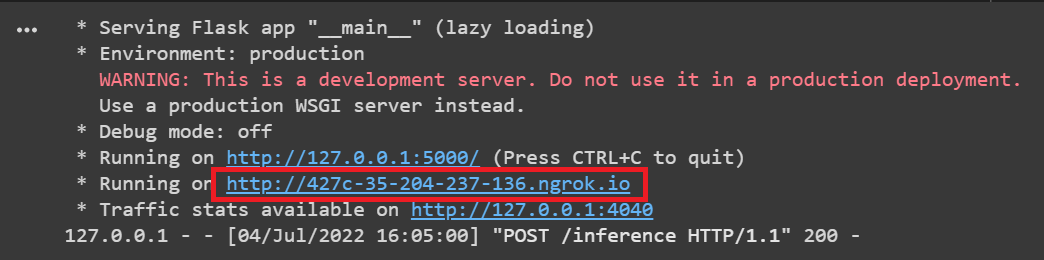